In [43]:
#Importing all the required things:
import pandas as pd #Used for data manipulation and reading the csv file
import matplotlib.pyplot as plt #Used for visualizing the ERD
from bs4 import BeautifulSoup #Used for displaying table schema in HTML format. 
import os #For handeling files

In [44]:
import os #importing the path of the downloaded web page table.
print(os.path.exists(r"C:\Users\Dell\techkraft\Superstore.csv"))


True


In [45]:
file_path = r"C:\Users\Dell\techkraft\Superstore.csv" 
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use the 'ISO-8859-1' encoding (ensures compatibility if special characters exist)

In [46]:
# Step 2: Normalize the data into separate tables
customer_df = df[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates() #.drop_duplicates-> to ensure each customer only appears ekchoti.
product_df = df[['Product ID', 'Category', 'Sub-Category', 'Product Name']].drop_duplicates()
order_df = df[['Order ID', 'Order Date', 'Ship Date', 'Customer ID']].drop_duplicates()
shipmode_df = df[['Ship Mode']].drop_duplicates()
fact_sales_df = df[['Order ID', 'Product ID', 'Ship Mode', 'Sales', 'Quantity', 'Discount', 'Profit']] #This table connects orders, product and ship mode for data storing transactional data.

In [47]:
# Step 3: Save to CSV files(Each normalise gareko table lai csv file ma save garcha  yesle.)
customer_df.to_csv("customer.csv", index=False) 
product_df.to_csv("product.csv", index=False)
order_df.to_csv("order.csv", index=False)
shipmode_df.to_csv("shipmode.csv", index=False)
fact_sales_df.to_csv("fact_sales.csv", index=False)

In [48]:
# Step 4: Generate ERD using Graphviz(yesle import garcha diagraph from graphviz jun le help garcha to create a diagram )
from graphviz import Digraph 

In [49]:
erg = Digraph() 


In [50]:
#these are used for adding entities to the table
erg.node("Customer", "Customer_ID (PK)\nCustomer_Name\nSegment")
erg.node("Product", "Product_ID (PK)\nCategory\nSub_Category\nProduct_Name")
erg.node("Order", "Order_ID (PK)\nOrder_Date\nShip_Date\nCustomer_ID (FK)")
erg.node("ShipMode", "Ship_Mode (PK)")
erg.node("FactSales", "Order_ID (FK)\nProduct_ID (FK)\nShip_Mode (FK)\nSales\nQuantity\nDiscount\nProfit")


In [51]:
# Define relationships between tables
erg.edge("Customer", "Order", label="has") #A customer has multiple orders
erg.edge("Order", "FactSales", label="contains") #An order contains multiple records in FactSales
erg.edge("Product", "FactSales", label="sold in")  #A product is sold in FactSales
erg.edge("ShipMode", "FactSales", label="used in") #A shipmode is used in FactSales


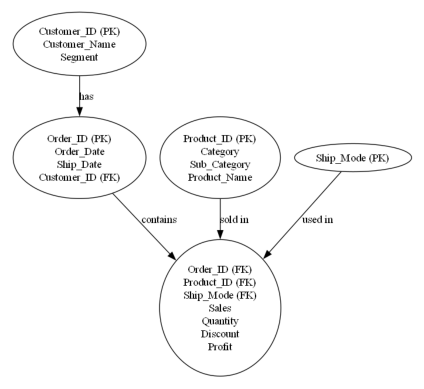

In [52]:
# Step 5: Yo code le ERD lai as PNG  save gari display garcha
erg.render("ERD", format="png", cleanup=True) #true le unnecessary data remove gari clean garcha

import matplotlib.pyplot as plt
plt.imshow(plt.imread("ERD.png"))
plt.axis("off")
plt.show()

In [53]:
# Step 6: Display table schema using BeautifulSoup 
#(yo code le html table store gari schema describe garne garcha for primary and foreign keys by using beautiful soup to format and print the table.)
html_data = """
<table>
<tr><th>Table</th><th>Primary Key</th><th>Foreign Key</th></tr>
<tr><td>Customer</td><td>Customer_ID</td><td>-</td></tr>
<tr><td>Product</td><td>Product_ID</td><td>-</td></tr>
<tr><td>Order</td><td>Order_ID</td><td>Customer_ID</td></tr>
<tr><td>ShipMode</td><td>Ship_Mode</td><td>-</td></tr>
<tr><td>FactSales</td><td>-</td><td>Order_ID, Product_ID, Ship_Mode</td></tr>
</table>
"""


In [42]:
soup = BeautifulSoup(html_data, "html.parser")
print(soup.prettify())

<table>
 <tr>
  <th>
   Table
  </th>
  <th>
   Primary Key
  </th>
  <th>
   Foreign Key
  </th>
 </tr>
 <tr>
  <td>
   Customer
  </td>
  <td>
   Customer_ID
  </td>
  <td>
   -
  </td>
 </tr>
 <tr>
  <td>
   Product
  </td>
  <td>
   Product_ID
  </td>
  <td>
   -
  </td>
 </tr>
 <tr>
  <td>
   Order
  </td>
  <td>
   Order_ID
  </td>
  <td>
   Customer_ID
  </td>
 </tr>
 <tr>
  <td>
   ShipMode
  </td>
  <td>
   Ship_Mode
  </td>
  <td>
   -
  </td>
 </tr>
 <tr>
  <td>
   FactSales
  </td>
  <td>
   -
  </td>
  <td>
   Order_ID, Product_ID, Ship_Mode
  </td>
 </tr>
</table>

